In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/home/clementpoiret/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/clementpoiret/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
birddata = pd.read_csv('bird_tracking.csv')

In [3]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [4]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [5]:
ix = birddata.bird_name == 'Eric'

In [6]:
x, y = birddata.longitude[ix], birddata.latitude[ix]

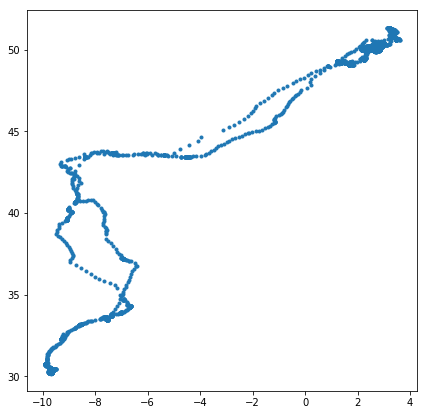

In [7]:
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

In [8]:
bird_names = pd.unique(birddata.bird_name)

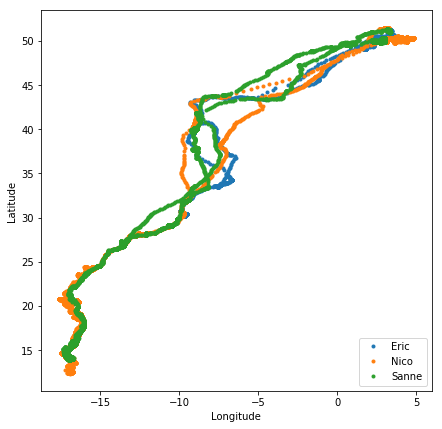

In [9]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right')
plt.savefig('3traj.pdf')

Text(0,0.5,'Frequency')

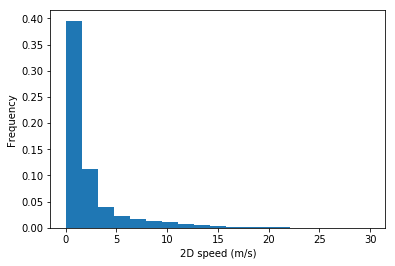

In [10]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), density=True)
plt.xlabel('2D speed (m/s)')
plt.ylabel('Frequency')

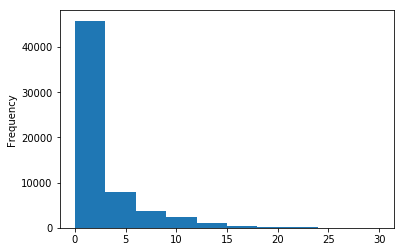

In [11]:
birddata.speed_2d.plot(kind='hist', range=[0, 30])

In [12]:
date_str = birddata.date_time[0]

In [13]:
date_str

'2013-08-15 00:18:08+00'

In [14]:
date_str[:-3]

'2013-08-15 00:18:08'

In [15]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [16]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
                    (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [17]:
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

In [18]:
times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed_time = [time - times[0] for time in times]

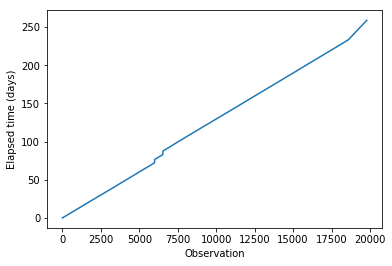

In [19]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");

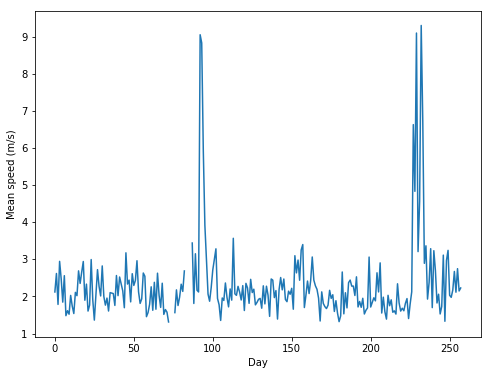

In [20]:
data = birddata[birddata.bird_name == "Eric"]
time = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
        
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)");
plt.savefig("dms.pdf")

In [21]:
birddata[birddata.bird_name == "Sanne"].date_time

40916    2013-08-15 00:01:08+00
40917    2013-08-15 00:31:00+00
40918    2013-08-15 01:01:19+00
40919    2013-08-15 01:31:38+00
40920    2013-08-15 02:01:24+00
40921    2013-08-15 02:31:18+00
40922    2013-08-15 03:00:54+00
40923    2013-08-15 03:15:57+00
40924    2013-08-15 03:31:13+00
40925    2013-08-15 03:46:28+00
40926    2013-08-15 04:01:56+00
40927    2013-08-15 04:16:55+00
40928    2013-08-15 04:31:54+00
40929    2013-08-15 04:47:08+00
40930    2013-08-15 05:02:15+00
40931    2013-08-15 05:17:08+00
40932    2013-08-15 05:32:04+00
40933    2013-08-15 05:46:58+00
40934    2013-08-15 06:01:55+00
40935    2013-08-15 06:16:50+00
40936    2013-08-15 06:31:47+00
40937    2013-08-15 06:46:43+00
40938    2013-08-15 07:01:42+00
40939    2013-08-15 07:16:44+00
40940    2013-08-15 07:31:59+00
40941    2013-08-15 07:47:01+00
40942    2013-08-15 08:02:53+00
40943    2013-08-15 08:17:56+00
40944    2013-08-15 08:32:50+00
40945    2013-08-15 08:48:01+00
                  ...          
61890   

/home/clementpoiret/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


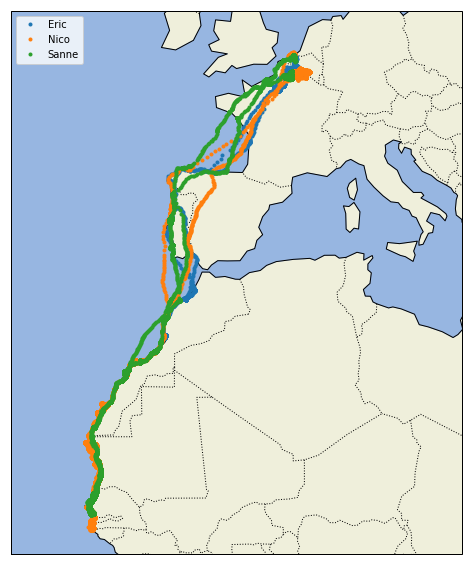

In [22]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)

plt.legend(loc='upper left')
plt.savefig('map.pdf')

In [31]:
grouped_birds = birddata.groupby("bird_name")

mean_speeds = grouped_birds.speed_2d.mean()

print(grouped_birds.head())

mean_altitudes = grouped_birds.altitude.mean()


       altitude               date_time  device_info_serial   direction  \
0            71  2013-08-15 00:18:08+00                 851 -150.469753   
1            68  2013-08-15 00:48:07+00                 851 -136.151141   
2            68  2013-08-15 01:17:58+00                 851  160.797477   
3            73  2013-08-15 01:47:51+00                 851   32.769360   
4            69  2013-08-15 02:17:42+00                 851   45.191230   
19795       382  2013-08-15 00:20:45+00                 864  145.179141   
19796       197  2013-08-15 00:51:00+00                 864  -25.393443   
19797       206  2013-08-15 01:21:08+00                 864  158.480445   
19798       200  2013-08-15 01:50:57+00                 864  139.613245   
19799       199  2013-08-15 02:20:48+00                 864 -134.485593   
40916        55  2013-08-15 00:01:08+00                 833  -91.499509   
40917        54  2013-08-15 00:31:00+00                 833 -141.804053   
40918        55  2013-08-

In [32]:
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

In [35]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Check the head of the column.
print(birddata.date.head())

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()
print(mean_altitudes_perday.head())

0    2013-08-15
1    2013-08-15
2    2013-08-15
3    2013-08-15
4    2013-08-15
Name: date, dtype: object
date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
Name: altitude, dtype: float64


In [36]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name", "date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()

# look at the head of `mean_altitudes_perday`.
print(mean_altitudes_perday.head())

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64


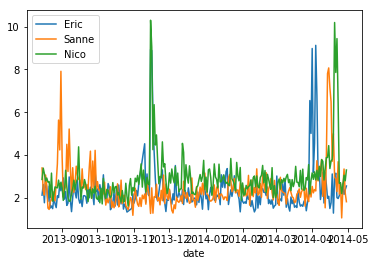

In [37]:
mean_speeds = grouped_birdday.speed_2d.mean()

eric_daily_speed  = mean_speeds["Eric"]
sanne_daily_speed = mean_speeds["Sanne"]
nico_daily_speed  = mean_speeds["Nico"]

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()
